In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
import pydot
import graphviz
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

In [2]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data = []
x_size_data = []
x_position_data = []
y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### データ
with open(one_hole_path) as f1:
  for line in f1:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(four_holes_path) as f2:
  for line in f2:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(nine_holes_path) as f3:
  for line in f3:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(sixteen_holes_path) as f4:
  for line in f4:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(twentyfive_holes_path) as f5:
  for line in f5:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
x_size_data = np.array(x_size_data, dtype=float)
x_position_data = np.array(x_position_data, dtype=float)
y_data = np.array(y_data, dtype=float)

### データの加工
y_data = y_data - no_hole_data

### train用とtest用に分割(4:1)
x_size_train, x_size_test, x_position_train, x_position_test, y_train, y_test = train_test_split(x_size_data, x_position_data, y_data, test_size=0.20)


### reshape
x_size_train = x_size_train.reshape(8108, 1, 1)
x_size_test = x_size_test.reshape(2027, 1, 1)
x_position_train = x_position_train.reshape(8108, 2, 1)
x_position_test = x_position_test.reshape(2027, 2, 1)

In [23]:
print(y_data[0])

[ 2.557784  2.543381  2.538138  2.467777  2.378596  2.270771  2.102696
  1.942521  1.906544  1.816205  1.693835  1.548945  1.408147  1.163802
  0.97954   0.725496  0.057869 -0.476413 -0.579824 -1.230726 -2.269664
 -1.859676  0.        0.        0.        0.        0.       -2.516584
 -2.096461 -2.15331  -1.967765 -1.57313  -1.557507 -2.118946 -2.27163
 -2.375958 -2.430187 -2.530786 -2.498247 -2.625499 -2.705656 -2.638797
 -2.718241 -2.941427 -3.033957 -3.148112 -3.37039  -3.468686 -3.537617
 -3.560005]


In [15]:
# 入力を定義
size_input = Input(shape=(1,))
position_input = Input(shape=(2,))

# 入力1から結合前まで
x = Dense(1, activation="linear")(size_input)
x = Model(inputs=size_input, outputs=x)

# 入力2から結合前まで
y = Dense(1, activation="linear")(position_input)
y = Model(inputs=position_input, outputs=y)

# 結合
combined = concatenate([x.output, y.output])

# 密結合
z = Dense(128, activation="linear")(combined)
z = Dense(50, activation="linear")(z)

# モデル定義とコンパイル
model = Model(inputs=[x.input, y.input], outputs=z)
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 1)            2           input_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1)            3           input_4[0][0]                    
____________________________________________________________________________________________

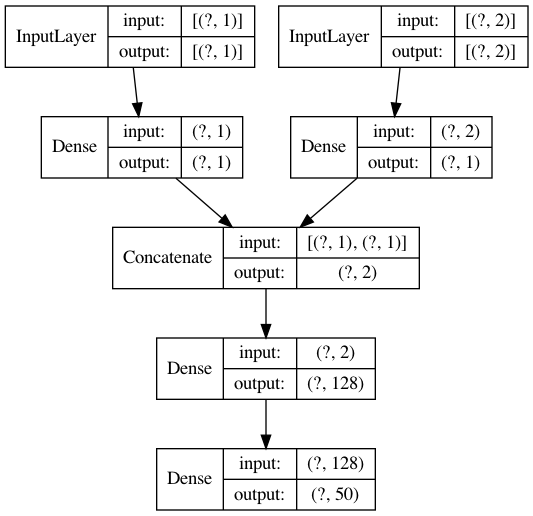

In [16]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [17]:
# 学習
epochs = 1000
batch_size = 128
history = model.fit([x_size_train, x_position_train], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test, x_position_test], y_test))

Epoch 1/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.6095 - acc: 0.1984 - val_loss: 1.2072 - val_acc: 0.9482
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.1028 - acc: 0.5810 - val_loss: 1.0952 - val_acc: 0.7953
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.9906 - acc: 0.5011 - val_loss: 0.9647 - val_acc: 0.4050
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.8643 - acc: 0.4999 - val_loss: 0.8373 - val_acc: 0.4983
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.7269 - acc: 0.4262 - val_loss: 0.6913 - val_acc: 0.4702
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5852 - acc: 0.4346 - val_loss: 0.5497 - val_acc: 0.4603
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4680 - acc: 0.4240 - val_loss: 0.4590 - val_acc: 0.3922
Epoch 8/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.

64/64 [==============================] - 0s 2ms/step - loss: 0.3513 - acc: 0.9481 - val_loss: 0.3861 - val_acc: 0.9699
Epoch 63/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3519 - acc: 0.9248 - val_loss: 0.3860 - val_acc: 0.9724
Epoch 64/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3519 - acc: 0.9206 - val_loss: 0.3849 - val_acc: 0.5659
Epoch 65/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3513 - acc: 0.9044 - val_loss: 0.3842 - val_acc: 0.9724
Epoch 66/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3504 - acc: 0.9420 - val_loss: 0.3843 - val_acc: 0.9724
Epoch 67/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3516 - acc: 0.9021 - val_loss: 0.3839 - val_acc: 0.9724
Epoch 68/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3506 - acc: 0.9254 - val_loss: 0.3856 - val_acc: 0.9724
Epoch 69/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3507 -

64/64 [==============================] - 0s 2ms/step - loss: 0.3464 - acc: 0.8172 - val_loss: 0.3791 - val_acc: 0.9724
Epoch 124/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3471 - acc: 0.8529 - val_loss: 0.3815 - val_acc: 0.9724
Epoch 125/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3464 - acc: 0.8788 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 126/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3460 - acc: 0.8913 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 127/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3460 - acc: 0.9397 - val_loss: 0.3786 - val_acc: 0.4840
Epoch 128/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9272 - val_loss: 0.3797 - val_acc: 0.9724
Epoch 129/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3460 - acc: 0.9208 - val_loss: 0.3791 - val_acc: 0.4677
Epoch 130/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9312 - val_loss: 0.3789 - val_acc: 0.3986
Epoch 185/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9330 - val_loss: 0.3793 - val_acc: 0.9724
Epoch 186/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3792 - val_acc: 0.9724
Epoch 187/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3459 - acc: 0.9555 - val_loss: 0.3797 - val_acc: 0.9724
Epoch 188/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3464 - acc: 0.9264 - val_loss: 0.3783 - val_acc: 0.9724
Epoch 189/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - acc: 0.9650 - val_loss: 0.3809 - val_acc: 0.9724
Epoch 190/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3462 - acc: 0.9534 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 191/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3458 - acc: 0.9639 - val_loss: 0.3789 - val_acc: 0.9724
Epoch 246/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3457 - acc: 0.9642 - val_loss: 0.3807 - val_acc: 0.9724
Epoch 247/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3469 - acc: 0.9560 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 248/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9650 - val_loss: 0.3790 - val_acc: 0.9724
Epoch 249/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3460 - acc: 0.9650 - val_loss: 0.3796 - val_acc: 0.9724
Epoch 250/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3463 - acc: 0.9620 - val_loss: 0.3790 - val_acc: 0.9724
Epoch 251/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9473 - val_loss: 0.3791 - val_acc: 0.9724
Epoch 252/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3469 - acc: 0.9344 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 307/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3459 - acc: 0.9650 - val_loss: 0.3800 - val_acc: 0.9724
Epoch 308/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9650 - val_loss: 0.3790 - val_acc: 0.9724
Epoch 309/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9650 - val_loss: 0.3797 - val_acc: 0.9724
Epoch 310/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - acc: 0.9650 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 311/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3457 - acc: 0.9650 - val_loss: 0.3788 - val_acc: 0.9724
Epoch 312/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3458 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 313/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 368/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3790 - val_acc: 0.9724
Epoch 369/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - acc: 0.9016 - val_loss: 0.3789 - val_acc: 0.9724
Epoch 370/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.8959 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 371/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 372/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3454 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 373/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3787 - val_acc: 0.9724
Epoch 374/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 429/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3794 - val_acc: 0.9724
Epoch 430/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3454 - acc: 0.9626 - val_loss: 0.3780 - val_acc: 0.9724
Epoch 431/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - acc: 0.9560 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 432/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3454 - acc: 0.9631 - val_loss: 0.3780 - val_acc: 0.9724
Epoch 433/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9650 - val_loss: 0.3791 - val_acc: 0.9724
Epoch 434/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3789 - val_acc: 0.9724
Epoch 435/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3787 - val_acc: 0.9724
Epoch 490/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3458 - acc: 0.9650 - val_loss: 0.3790 - val_acc: 0.9724
Epoch 491/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9645 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 492/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9576 - val_loss: 0.3784 - val_acc: 0.9235
Epoch 493/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9639 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 494/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - acc: 0.9650 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 495/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3448 - acc: 0.9650 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 496/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9623 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 551/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3454 - acc: 0.9650 - val_loss: 0.3791 - val_acc: 0.9724
Epoch 552/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3457 - acc: 0.9650 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 553/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9648 - val_loss: 0.3780 - val_acc: 0.9724
Epoch 554/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - acc: 0.9650 - val_loss: 0.3792 - val_acc: 0.9724
Epoch 555/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - acc: 0.9650 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 556/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9650 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 557/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9563 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 612/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - acc: 0.9650 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 613/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3787 - val_acc: 0.9724
Epoch 614/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9650 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 615/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - acc: 0.9650 - val_loss: 0.3789 - val_acc: 0.9724
Epoch 616/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9648 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 617/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3780 - val_acc: 0.9724
Epoch 618/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 673/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9647 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 674/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - acc: 0.9552 - val_loss: 0.3784 - val_acc: 0.6285
Epoch 675/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - acc: 0.9134 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 676/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3454 - acc: 0.8347 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 677/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9412 - val_loss: 0.3779 - val_acc: 0.9724
Epoch 678/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 679/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3454 - acc: 0.9650 - val_loss: 0.3808 - val_acc: 0.9724
Epoch 734/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3462 - acc: 0.9623 - val_loss: 0.3798 - val_acc: 0.9724
Epoch 735/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9295 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 736/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9650 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 737/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3448 - acc: 0.9650 - val_loss: 0.3779 - val_acc: 0.9724
Epoch 738/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3454 - acc: 0.9650 - val_loss: 0.3796 - val_acc: 0.9724
Epoch 739/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9650 - val_loss: 0.3790 - val_acc: 0.9724
Epoch 740/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9650 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 795/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 796/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3448 - acc: 0.9650 - val_loss: 0.3783 - val_acc: 0.9724
Epoch 797/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9650 - val_loss: 0.3780 - val_acc: 0.9724
Epoch 798/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3787 - val_acc: 0.9724
Epoch 799/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 800/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3780 - val_acc: 0.9724
Epoch 801/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 856/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 857/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3788 - val_acc: 0.9724
Epoch 858/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - acc: 0.9650 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 859/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 860/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 861/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3779 - val_acc: 0.9724
Epoch 862/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - acc: 0.9650 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 917/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3783 - val_acc: 0.9724
Epoch 918/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 919/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3783 - val_acc: 0.9724
Epoch 920/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 921/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.9650 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 922/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3782 - val_acc: 0.9724
Epoch 923/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 978/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - acc: 0.9650 - val_loss: 0.3786 - val_acc: 0.9724
Epoch 979/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - acc: 0.9650 - val_loss: 0.3785 - val_acc: 0.9724
Epoch 980/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3779 - val_acc: 0.9724
Epoch 981/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3784 - val_acc: 0.9724
Epoch 982/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9650 - val_loss: 0.3781 - val_acc: 0.9724
Epoch 983/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3448 - acc: 0.9650 - val_loss: 0.3780 - val_acc: 0.9724
Epoch 984/1000
64/64 [==============================] - 0s 2ms/step - loss: 0

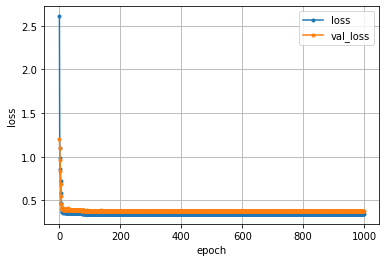

In [18]:
# 学習経過の可視化(大きさ)
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

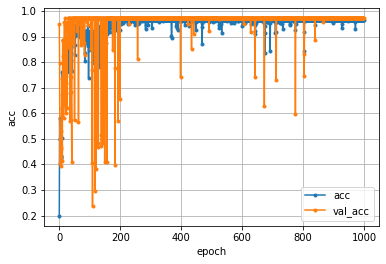

In [19]:
# 学習経過の可視化(大きさ)
acc     = history.history['acc']
val_acc = history.history['val_acc']

nb_epoch = len(acc)
plt.plot(range(nb_epoch), acc,     marker='.', label='acc')
plt.plot(range(nb_epoch), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [20]:
predict = model.predict([x_size_test, x_position_test])

In [21]:
print(predict[0]-y_test[0])

[-2.16665508 -2.15389045 -2.13224553 -2.09519246 -2.05618844 -1.96215615
 -1.88092601 -1.76328195 -1.60001815 -1.43097866 -1.26764585 -1.10249931
 -0.95914957 -0.81953924 -0.67368146 -0.53594574 -0.43606891 -0.31543345
 -0.20376318 -0.10285429 -0.01121261  0.0654718   0.00442654 -0.01393711
 -0.00219647 -0.00529845  0.00409971  0.20913168  0.23664007  0.24602723
  0.24434292  0.22227958  0.20165131  0.17765756  0.16248405  0.14602654
  0.12857097  0.10668465  0.08602051  0.0701135   0.05968825  0.04449544
  0.03171583  0.02147571  0.0133101   0.00394117 -0.00277169 -0.00536676
 -0.01401399 -0.01663748]
